<a href="https://colab.research.google.com/github/roksanaoni/ML_manual_01/blob/main/K_means_Iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from sklearn.datasets import load_iris
iris = load_iris ()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [9]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

In [10]:
iris = datasets.load_iris ()

In [11]:
print (iris.data [0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [13]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
# assigning column labels SL, SW, PL, PW for SL: Sepal Length ,
# SW: Sepal Width , PL: Petal Length and PW: Petal Width.
x = pd.DataFrame(iris.data , columns=['SL','SW','PL','PW'])
y = pd.DataFrame(iris.target , columns=['Target'])

In [15]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


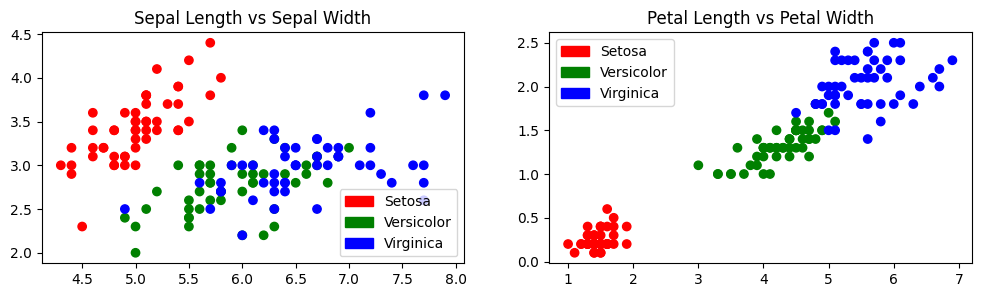

In [17]:
plt.figure(figsize =(12 ,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

plt.subplot(1, 2, 1)
plt.scatter(x['SL'], x['SW'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch , green_patch , blue_patch ])

plt.subplot (1,2,2)
plt.scatter(x['PL'], x['PW'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch , green_patch , blue_patch ])

In [18]:
iris_k_mean_model = KMeans(n_clusters =3) # we set K = 3
iris_k_mean_model.fit(x) # trained using the entire dataset

KMeans(n_clusters=3)

In [19]:
print(iris_k_mean_model.predict(x))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [20]:
print (iris_k_mean_model.cluster_centers_)

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


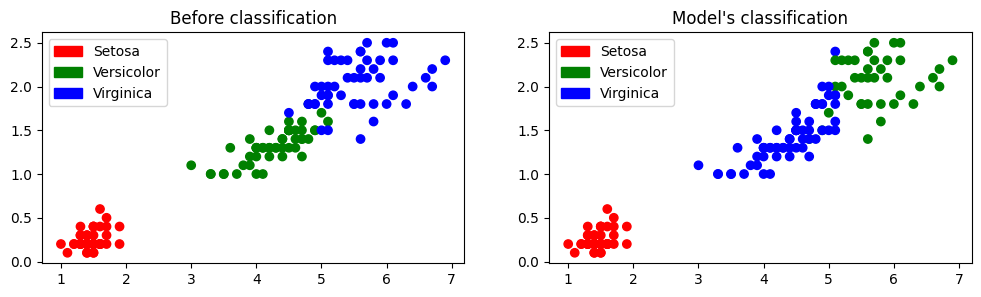

In [21]:
plt.figure(figsize =(12 ,3))

colors = np.array(['red', 'green', 'blue'])

predictedY=np.choose(iris_k_mean_model.labels_ ,[1,0,2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['PL'], x['PW'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch , green_patch , blue_patch ])

plt.subplot(1, 2, 2)
plt.scatter(x['PL'], x['PW'], c=colors[predictedY ])
plt.title("Model's classification")
plt.legend(handles=[red_patch , green_patch , blue_patch ])

In [22]:
sm.accuracy_score(predictedY , y['Target'])

0.44666666666666666

In [23]:
sm.confusion_matrix(predictedY , y['Target'])

array([[50,  0,  0],
       [ 0,  3, 36],
       [ 0, 47, 14]])